In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("spotify_songs.csv")

In [160]:
df.head(1)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754


In [143]:
# Returns df only with artists with more than 100 tracks on the chart

artist_counts = df.track_artist.value_counts()
top_100_artists = artist_counts[artist_counts >= 100].index.tolist()
top_artists = df[df['track_artist'].isin(top_100_artists)]


In [144]:
# Assigning top artists a popularity score based on number of tracks on chart
top_artists_popularity_score = top_artists['track_artist'].value_counts().to_dict()
top_artists['popularity'] = top_artists['track_artist'].map(top_artists_popularity_score)

/var/folders/_v/swcgdh2j22n2qvz2080yh82c0000gn/T/ipykernel_7821/497223521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_artists['popularity'] = top_artists['track_artist'].map(top_artists_popularity_score)


In [145]:
# Normalizing popularity score
X_min = 20
X_max = 161

top_artists['normalized_score'] = (top_artists['popularity'] - X_min) / (X_max - X_min)
top_artists

/var/folders/_v/swcgdh2j22n2qvz2080yh82c0000gn/T/ipykernel_7821/3413800084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_artists['normalized_score'] = (top_artists['popularity'] - X_min) / (X_max - X_min)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,normalized_score
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.02870,0.000009,0.2040,0.277,121.956,169093,123,0.730496
14,55nMnifaQWKe3f9cbwOXwx,Summer Days (feat. Macklemore & Patrick Stump ...,Martin Garrix,63,2vx3BtBMn8Ed3ygEg1OT2t,Summer Days (feat. Macklemore & Patrick Stump ...,2019-07-12,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0594,0.00733,0.001830,0.0729,0.238,126.070,255238,161,1.000000
17,3TjLsDgL0bTbSQIF6M5Ki8,Say My Name (feat. Bebe Rexha & J Balvin) - Lu...,David Guetta,65,19z3vpbBT09lZ54neDfuFL,Say My Name (feat. Bebe Rexha & J Balvin) [Luc...,2018-12-28,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.1650,0.03950,0.000000,0.1740,0.516,120.002,189375,110,0.638298
22,1mC2UjWt25Oixtqu7C6suL,Don't Leave Me Alone (feat. Anne-Marie) - EDX'...,David Guetta,62,1WhPuMFm5VaTJqe9rl3C5Q,Don't Leave Me Alone (feat. Anne-Marie) [EDX's...,2019-05-08,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.1280,0.04690,0.000003,0.1190,0.336,123.938,210968,110,0.638298
24,4sqABRRGU7CzcHXCyxUzFw,Do You Mean (feat. Ty Dolla $ign & bülow) - My...,The Chainsmokers,58,5vf16sRhXB2f3sS5kteU2T,Do You Mean - The Remixes (feat. Ty Dolla $ign...,2019-05-24,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0352,0.01630,0.000019,0.3950,0.422,110.018,205093,123,0.730496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,6lBQ0SMCrJ7zy1LSCuXqwV,Lions in the Wild,Martin Garrix,57,2x8X4Dq12rXdQsmk41F3VV,Lions in the Wild,2016-05-27,"Festival Music 2019 - Warm Up Music (EDM, Big ...",73uj4YmsC7SJ6SbUMTvf07,edm,...,0,0.0442,0.00434,0.000000,0.8160,0.280,127.854,211890,161,1.000000
32553,0sfbunyd3a7IFoWwEt8dsk,Don't Leave Me Alone (feat. Anne-Marie) - Oliv...,David Guetta,49,4o8Y3L9WQvk3L3u9M0gngq,Don't Leave Me Alone (feat. Anne-Marie) [Olive...,2018-08-31,"Festival Music 2019 - Warm Up Music (EDM, Big ...",73uj4YmsC7SJ6SbUMTvf07,edm,...,0,0.0612,0.00790,0.000056,0.3590,0.155,125.965,204224,110,0.638298
32562,27YP211Rr8RezhiFVDLFI8,Waiting For Tomorrow (feat. Mike Shinoda),Martin Garrix,59,5dv1oLETxdsYOkS2Sic00z,BYLAW EP,2018-10-19,"Festival Music 2019 - Warm Up Music (EDM, Big ...",73uj4YmsC7SJ6SbUMTvf07,edm,...,0,0.1410,0.00731,0.000000,0.5620,0.336,128.015,247505,161,1.000000
32734,5qIzTkMpgEFfvkDdr9zJzg,Stay (Don't Go Away) [feat. Raye] - Nicky Rome...,David Guetta,54,7biIbzlDBUbV7p3SOwlF1q,Stay (Don't Go Away) [feat. Raye] [Nicky Romer...,2019-06-14,Trending EDM by Nik Cooper,4N1ipiKR3xla8UXtE12XBm,edm,...,1,0.0477,0.00569,0.000637,0.1610,0.233,124.986,177889,110,0.638298


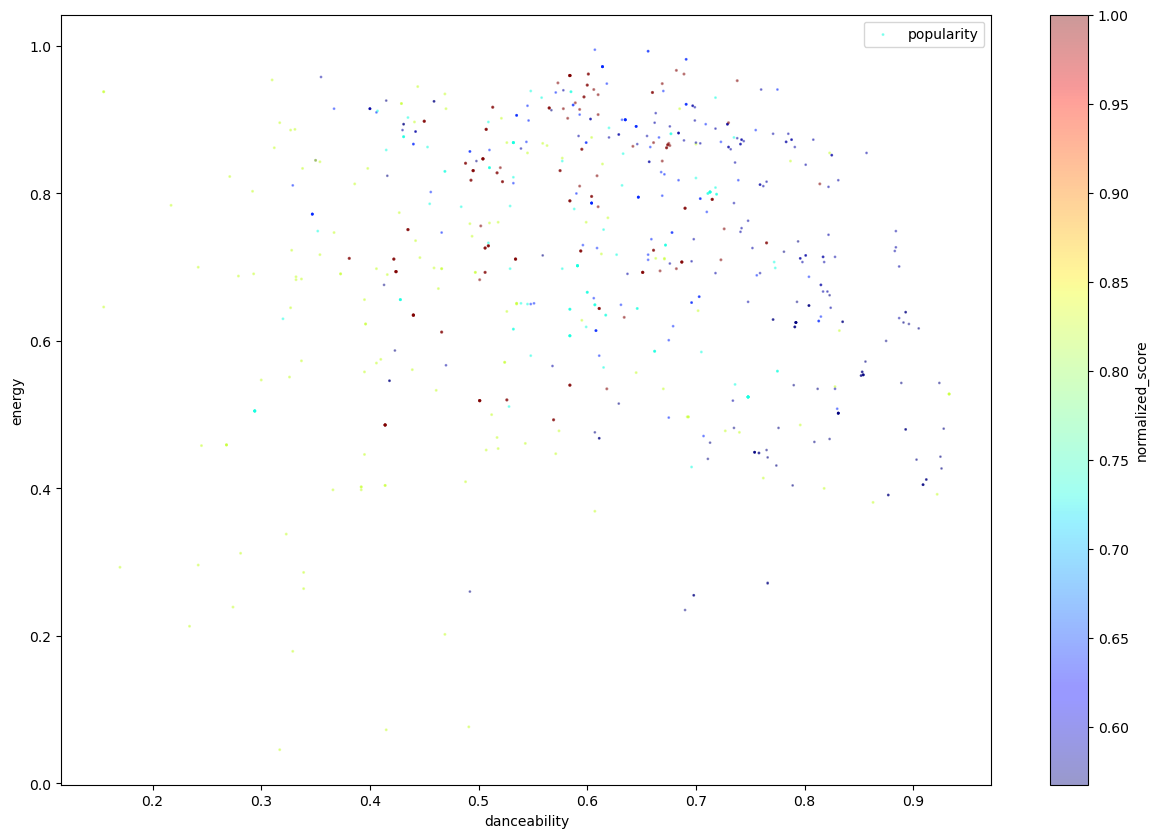

In [151]:
# Plotting top artists energy and danceability 

import matplotlib.pyplot as plt

top_artists.plot(kind='scatter', x='danceability', y='energy', alpha=0.4, s=top_artists['popularity']/100, label='popularity', figsize=(15,10), c='normalized_score', cmap = plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [152]:
df_float = pd.DataFrame(df, columns=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'])
df_object_playlist = pd.DataFrame(df, columns=['playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'])
df_object_track = pd.DataFrame(df, columns=['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date'])

In [153]:
df_object_track.track_album_release_date.value_counts

<bound method IndexOpsMixin.value_counts of 0        2019-06-14
1        2019-12-13
2        2019-07-05
3        2019-07-19
4        2019-03-05
            ...    
32828    2014-04-28
32829    2013-03-08
32830    2014-04-21
32831    2014-01-01
32832    2014-03-03
Name: track_album_release_date, Length: 32833, dtype: object>

In [154]:
corr_matrix = df_float.corr()
print(corr_matrix)

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000 -0.086073  0.025335     0.181721     -0.024519   
energy               -0.086073  1.000000  0.676625    -0.032150     -0.539745   
loudness              0.025335  0.676625  1.000000     0.010339     -0.361638   
speechiness           0.181721 -0.032150  0.010339     1.000000      0.026092   
acousticness         -0.024519 -0.539745 -0.361638     0.026092      1.000000   
instrumentalness     -0.008655  0.033247 -0.147824    -0.103424     -0.006850   
liveness             -0.123859  0.161223  0.077613     0.055426     -0.077243   

                  instrumentalness  liveness  
danceability             -0.008655 -0.123859  
energy                    0.033247  0.161223  
loudness                 -0.147824  0.077613  
speechiness              -0.103424  0.055426  
acousticness             -0.006850 -0.077243  
instrumentalness          1.000000 -0.005507  
liveness              

In [155]:
corr_matrix['danceability'].sort_values(ascending=True)

liveness           -0.123859
energy             -0.086073
acousticness       -0.024519
instrumentalness   -0.008655
loudness            0.025335
speechiness         0.181721
danceability        1.000000
Name: danceability, dtype: float64

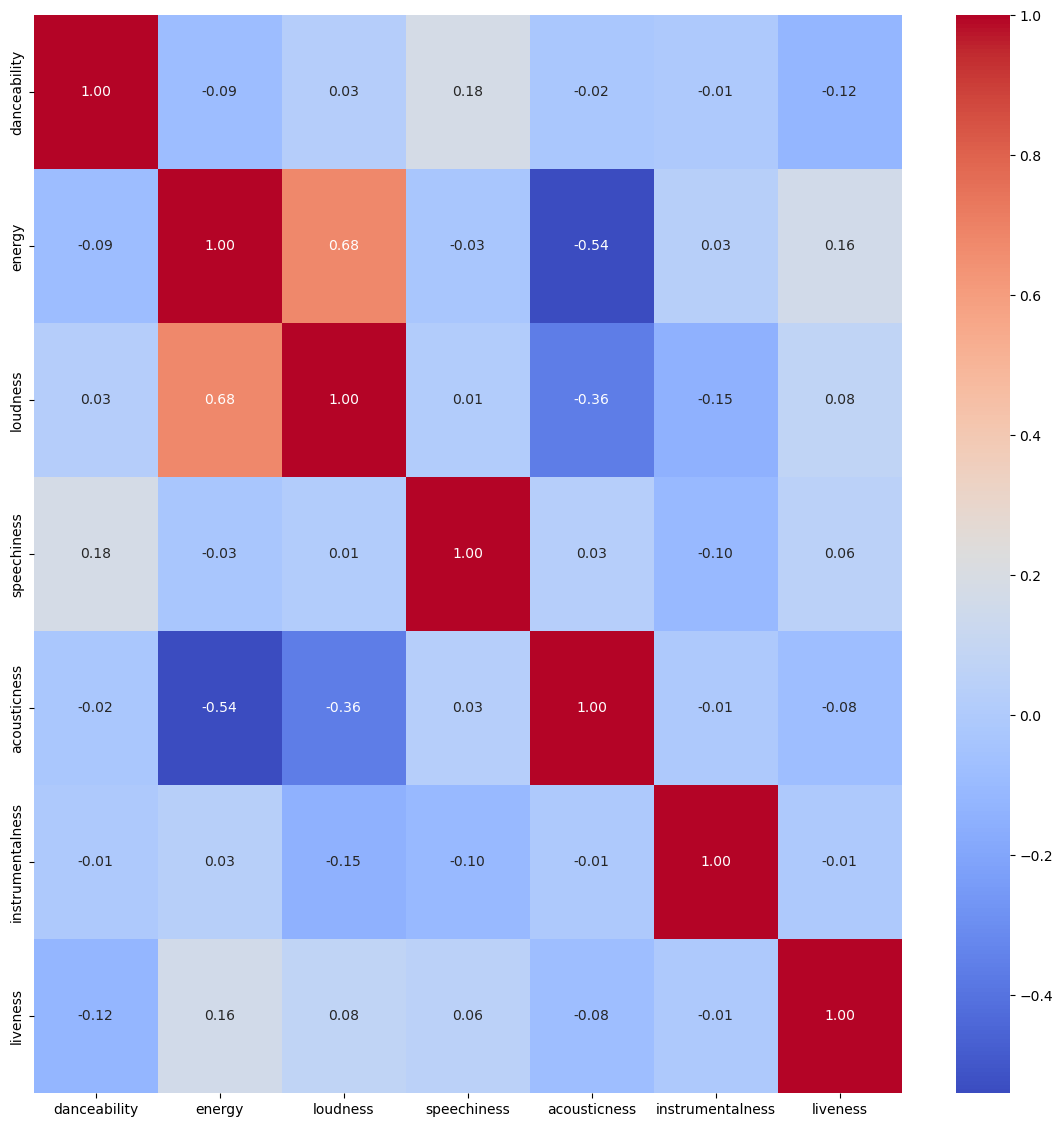

In [156]:
# Correlation heatmap
import seaborn as sns

plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

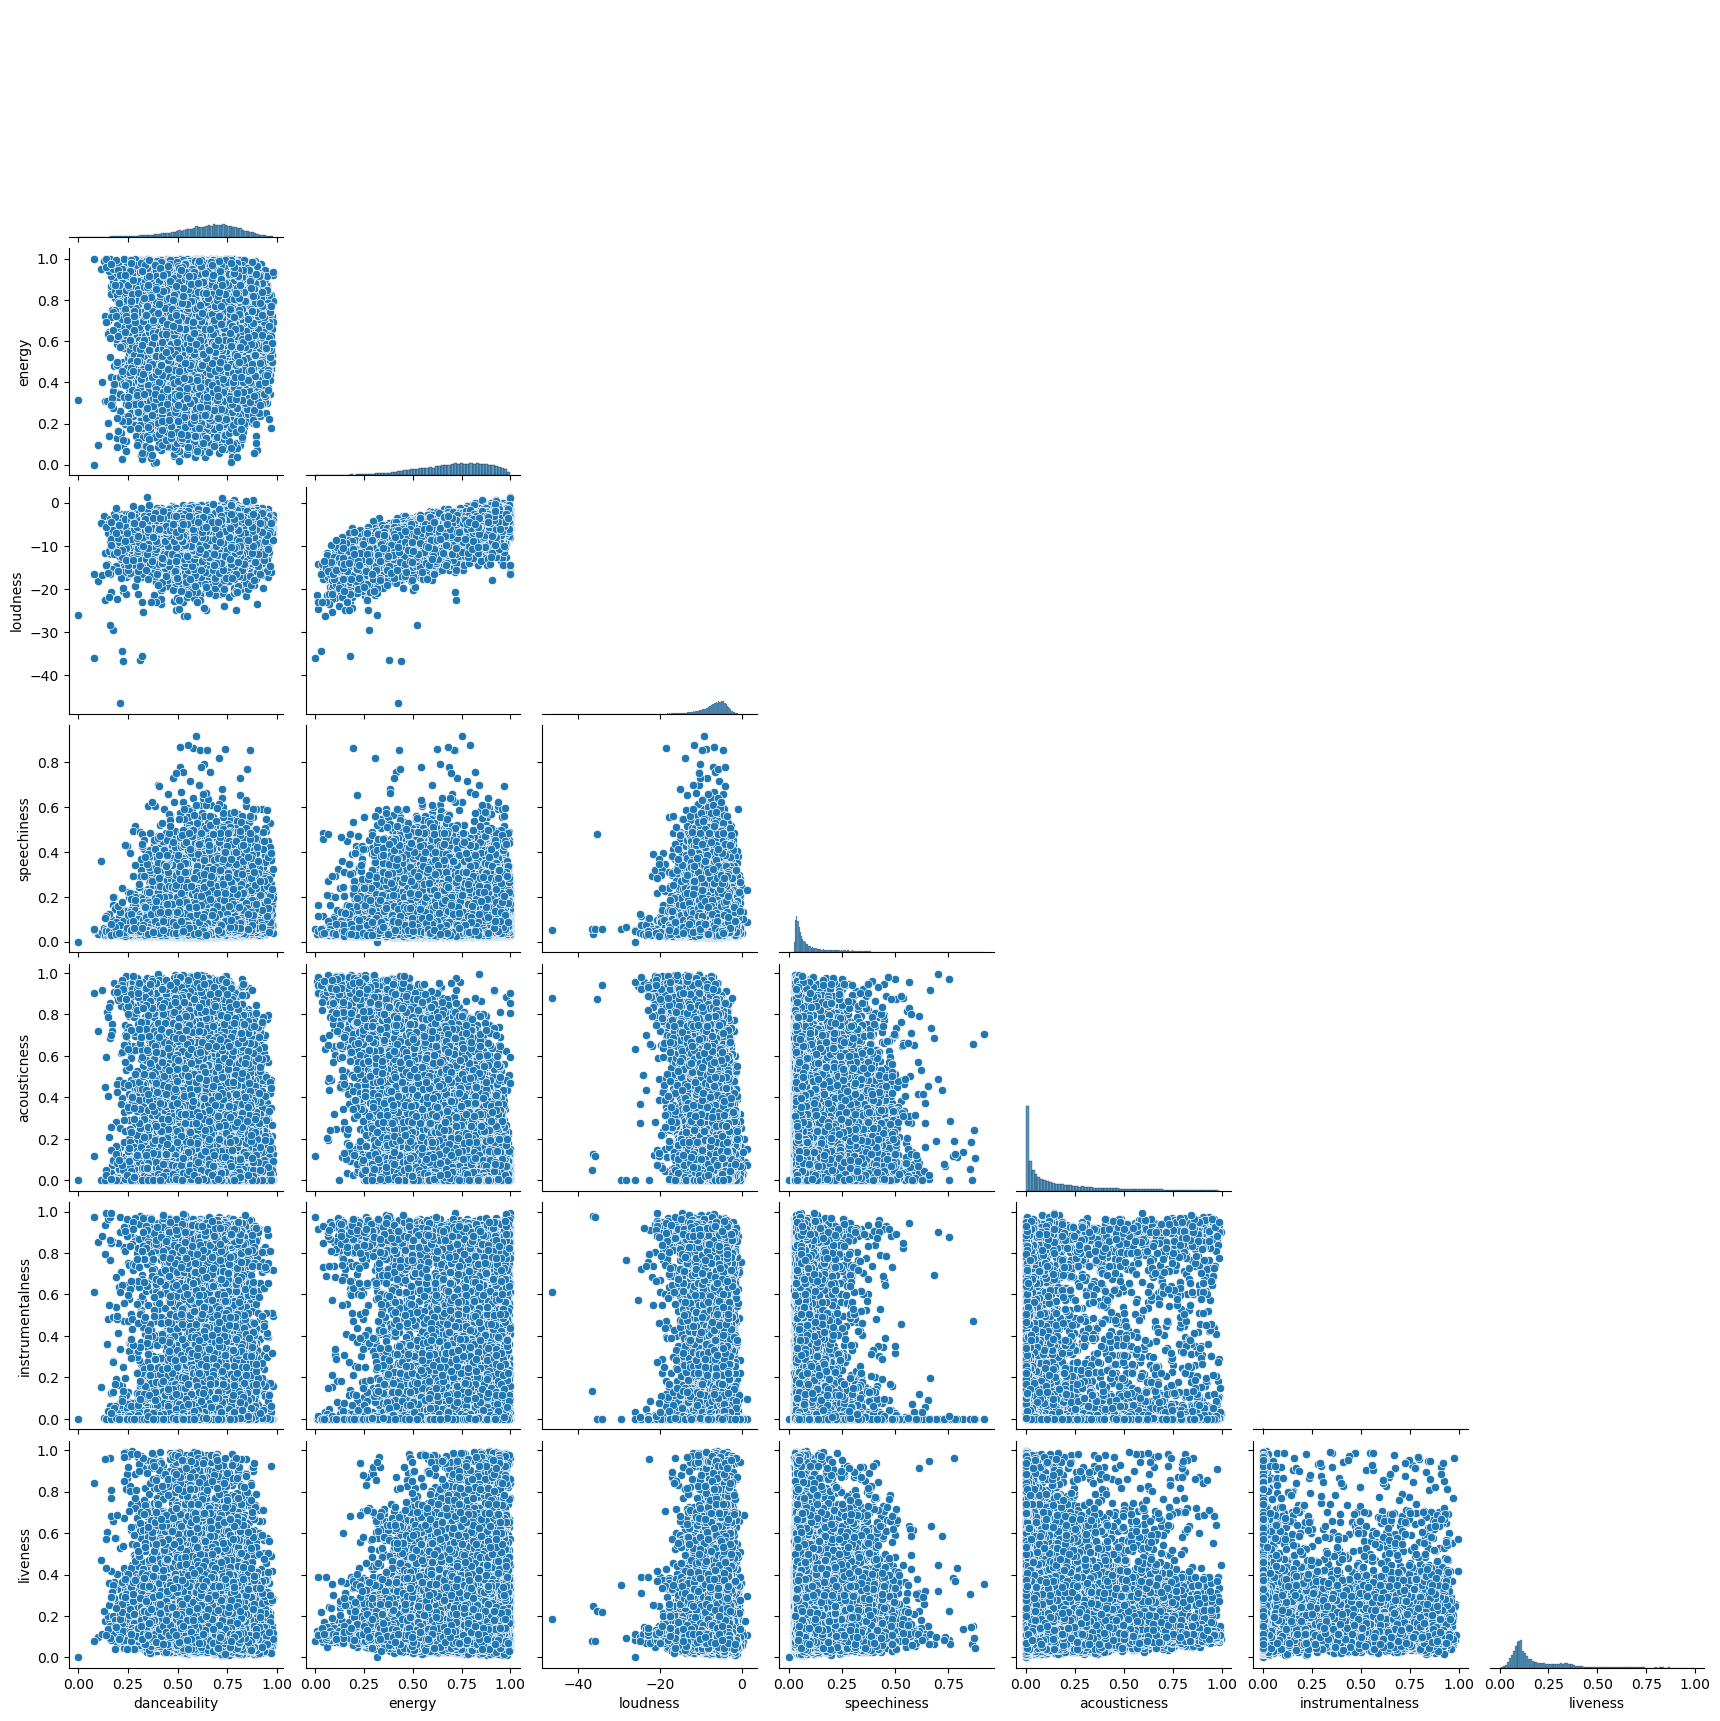

In [157]:
sns.pairplot(df_float, corner=True)
plt.show()

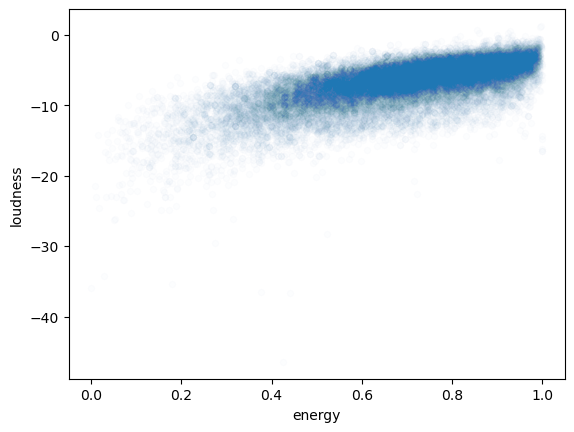

In [158]:
df_float.plot(kind='scatter', x='energy', y='loudness', alpha=0.01)
plt.show()

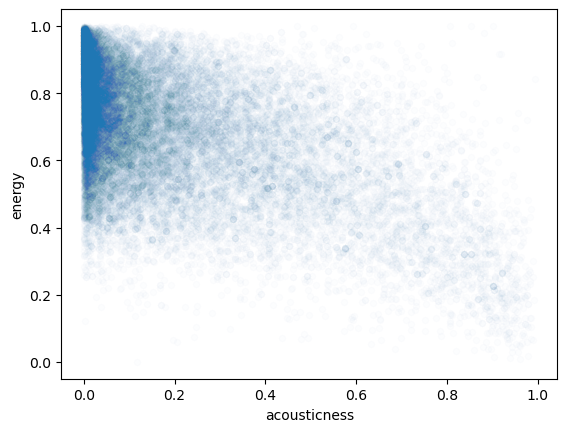

In [159]:
df_float.plot(kind='scatter', x='acousticness', y='energy', alpha=0.01)
plt.show()

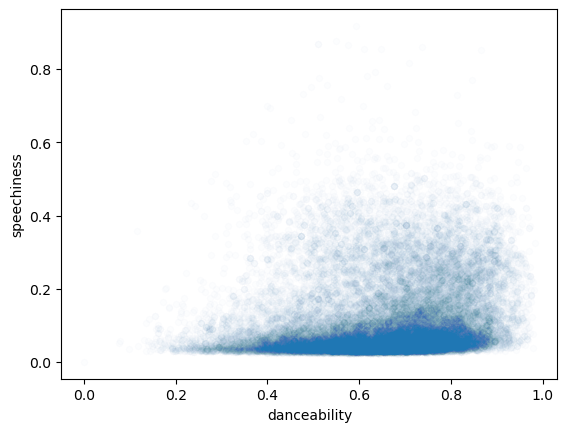

In [46]:
df_float.plot(kind='scatter', x='danceability', y='speechiness', alpha=0.01)
plt.show()